#YOLO를 인식

In [1]:
!git clone https://github.com/dhrim/darkeras-yolov4

Cloning into 'darkeras-yolov4'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 175 (delta 27), reused 25 (delta 23), pack-reused 139
Receiving objects: 100% (175/175), 8.08 MiB | 3.66 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [2]:
%cd darkeras-yolov4

/content/darkeras-yolov4


In [3]:
!wget -O weights/yolov3.weights https://pjreddie.com/media/files/yolov3.weights

--2022-09-07 09:24:46--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘weights/yolov3.weights’

weights/yolov3.weig 100%[===================>] 236.52M  17.1MB/s    in 15s     

2022-09-07 09:25:02 (15.8 MB/s) - ‘weights/yolov3.weights’ saved [248007048/248007048]



##모델 로딩

In [4]:
import yolov3_wrapper
model = yolov3_wrapper.YoloV3Wrapper("weights/yolov3.weights")

In [5]:
model.save("yolov3.h5")#

#구글 드라이브 마운트

In [6]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


##이미지 로딩

In [7]:
#폴더의 모든 사진을 불러옴 - 확인용 코드(안돌려도 됨)
import glob

for filename in glob.glob('/gdrive/MyDrive/DATA/SIT1500/TRAIN/*/*.jpg'):
  #print(filename)
  name_list = filename.split("/")
  #print(name_list)

# Open Pose 사용 코드 템플릿

https://github.com/ForgottenOneNyx/Open-Pose-Keras 의 코드를 사용하여 포즈를 추출한다.

프로젝트 내의 demo.ipynb를 기반으로 하였다.

# 프로젝트 다운로드

In [8]:
!git clone https://github.com/dhrim/Open-Pose-Keras

Cloning into 'Open-Pose-Keras'...
remote: Enumerating objects: 418, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 418 (delta 11), reused 21 (delta 11), pack-reused 397
Receiving objects: 100% (418/418), 29.70 MiB | 18.14 MiB/s, done.
Resolving deltas: 100% (236/236), done.


In [9]:
%cd Open-Pose-Keras

/content/darkeras-yolov4/Open-Pose-Keras


# 필요한 라이브러리 설치

In [10]:
!pip install configobj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=a0ff2128f405c25eb7512125e6eb502353aa75c6b8b7443c34e68e03c77ba55d
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


# 모델 로딩

In [11]:
from open_pose_wrapper import OpenPoseWrapper
model = OpenPoseWrapper()

Downloading...
From: https://drive.google.com/uc?id=1d9HGnnLhq6IhC5ZSVpBf7bSrpjNj5kPB
To: /content/darkeras-yolov4/Open-Pose-Keras/open_pose_model.h5
100%|██████████| 210M/210M [00:07<00:00, 29.9MB/s]


# 포즈 추출 실행

In [ ]:
#기존 예시 코드 - 실행 X
file_name = "yuna.jpg"
all_peaks, subset, candidate = model.extract(file_name)
model.draw_result(file_name, all_peaks, subset, candidate, draw_dot=True, draw_line=True)

In [ ]:
pwd

'/content/darkeras-yolov4/Open-Pose-Keras'

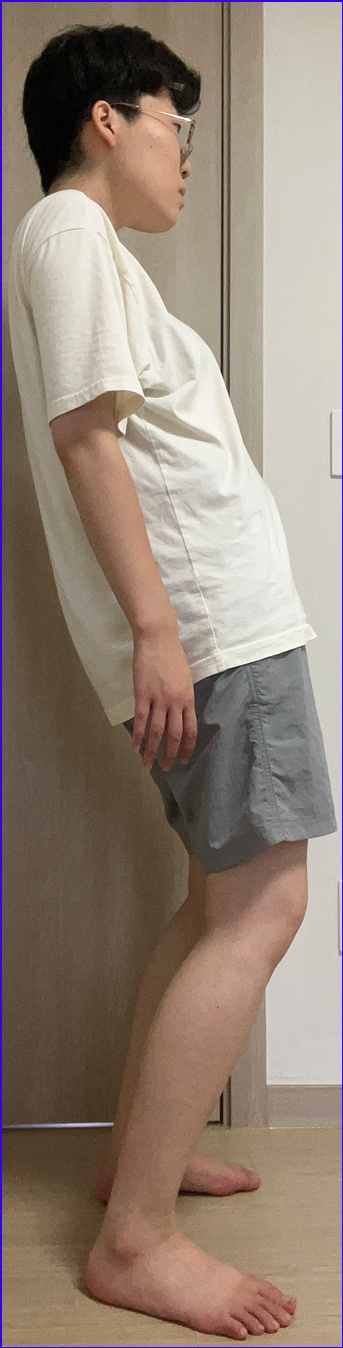

angle: neck_angle = 72.49913873104715, spine_angle = 78.36636600105956
label: neck_angle = 72.5, spine_angle = 78.37


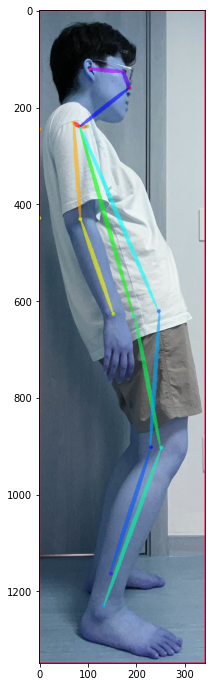

In [21]:
import glob
import config_reader
import math
import pandas as pd
from IPython.display import Image, display
from google.colab import output

index_list = []
neck_list = []
spine_list = []
outcome_list = []
arr = {}

#for file_name in glob.glob('/gdrive/MyDrive/DATA0829/STAND1500/TRAIN/GOOD/IMG_0643.jpg'):
for file_name in glob.glob('/gdrive/MyDrive/DATA0829/STAND1500/TRAIN/BAD4/IMG_9988.jpg'):
#for file_name in glob.glob('/gdrive/MyDrive/DATA0829/SIT1500/TEST/BAD1/20220817_190933_039.jpg'): #연습용 사진
#for file_name in glob.glob('/gdrive/MyDrive/DATA0829/SIT1500/TRAIN/*/*.jpg'): #원하는 디렉토리 경로로 변경
  all_peaks, subset, candidate = model.extract(file_name)
  model.draw_result(file_name, all_peaks, subset, candidate, draw_dot=True, draw_line=True)

  #2
  model.extract_and_draw(file_name)

  #3
  #part_str = [nose, neck, Rsho, Relb, Rwri, Lsho, Lelb, Lwri, Rhip, Rkne, Rank, Lhip, Lkne, Lank, Leye, Reye, Lear, Rear, pt19]
  _, model_params = config_reader.config_reader()
  part_str = model_params['part_str']
  #print(len(all_peaks))

  #4
  #Relb가 없으면 왼쪽을 바라 본 사진임으로 Relb 유무로 사진의 좌우를 판별
  if not all_peaks[4]: #Relb가 없는 경우 - 왼쪽을 바라본 사진
    if not all_peaks[-2]:
      all_peaks[-2] = all_peaks[-1]

    neck_angle = math.degrees(math.atan2(all_peaks[5][0][1] - all_peaks[-2][0][1], all_peaks[5][0][0] - all_peaks[-2][0][0])) #어깨 - 귀
    spine_angle = math.degrees(math.atan2(all_peaks[12][0][1] - all_peaks[11][0][1], all_peaks[12][0][0] - all_peaks[11][0][0])) #무릎 - 엉덩이
  else:
    if not all_peaks[-1]:
      all_peaks[-1] = all_peaks[-2]

    neck_angle = abs(math.degrees(math.atan2(all_peaks[-1][0][1] - all_peaks[2][0][1], all_peaks[-1][0][0] - all_peaks[2][0][0]))) #귀 - 어깨
    spine_angle = math.degrees(math.atan2(all_peaks[9][0][1] - all_peaks[8][0][1], all_peaks[9][0][0] - all_peaks[8][0][0]))

  #사진 출력
  display(Image(file_name))

  print(f"angle: neck_angle = {neck_angle}, spine_angle = {spine_angle}")

  #5
  #10을 빼고 반올림
  #neck_angle = round(neck_angle / 10)
  #spine_angle = round(spine_angle / 10)
  neck_angle = round(neck_angle, 2)
  spine_angle = round(spine_angle, 2)

  print(f"label: neck_angle = {neck_angle}, spine_angle = {spine_angle}")

  #index_list.append(file_name)
  index_list.append(file_name.split("/")[-1])
  neck_list.append(neck_angle)
  spine_list.append(spine_angle)

  outcome = file_name.split("/")[-2]
  #outcome = ''.join([i for i in file_name.split("/")[-2] if not i.isdigit()]) #폴더명에서 숫자 제거 - 이진분류용
  outcome_list.append(outcome)

arr.setdefault('file_name', index_list)
arr.setdefault('neck', neck_list)
arr.setdefault('spine', spine_list)
arr.setdefault('outcome', outcome_list)

#df = pd.DataFrame(arr, index = index_list)
df = pd.DataFrame(arr)

df.to_csv("/gdrive/MyDrive/tmp/df.csv") #

#sit - 오른쪽을 바라본 사진 각도 측정 오류남

In [22]:
df2 = pd.read_csv("/gdrive/MyDrive/tmp/df.csv", index_col=0)
#df2 = pd.read_csv("/gdrive/MyDrive/tmp/df.csv")

# Unnamed: 0 컬럼을 drop하여 제거
#df2.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [23]:
df2

,file_name,neck,spine,outcome
0,IMG_9988.jpg,72.5,78.37,BAD4


In [ ]:
import config_reader

_, model_params = config_reader.config_reader()
part_str = model_params['part_str']
for i in range(18):
  print(part_str[i], ": ", all_peaks[i])

[nose :  [(187, 161, 0.8330780863761902, 0)]
neck :  [(83, 240, 0.4976825714111328, 1), (0, 248, 0.12161698249656183, 2)]
Rsho :  [(71, 232, 0.7044049203395844, 3), (0, 245, 0.20391559280687943, 4)]
Relb :  [(0, 429, 0.12581959866747638, 5), (85, 431, 0.8134691268205643, 6)]
Rwri :  [(153, 627, 0.8231886774301529, 7)]
Lsho :  [(99, 240, 0.3881467208266258, 8)]
Lelb :  []
Lwri :  []
Rhip :  [(196, 631, 0.4165091924369335, 9)]
Rkne :  [(252, 903, 0.47416801238432527, 10)]
Rank :  [(134, 1229, 0.40713371615856886, 11)]
Lhip :  [(247, 621, 0.35170265659689903, 12)]
Lkne :  [(231, 902, 0.25908781826728955, 13)]
Lank :  [(148, 1163, 0.2999628409743309, 14)]
Leye :  [(173, 128, 0.8670471757650375, 15)]
Reye :  []
Lear :  [(106, 121, 0.9196580201387405, 16)]
Rear :  [(106, 121, 0.9196580201387405, 16)]


In [ ]:
#기존 예시 코드 - 실행 x
model.extract_and_draw(file_name)

# 추출 결과 해석

all_peak와 subset에 그 결과가 담긴다.

- all_peaks : 추출된 모든 포인트의 정보
- subset : 사람 별로 추출된 포인트의 정보

18개 부위를 추출한다.

각 부위의 이름은 config.py에 정의되어 있다.

```
part_str = [nose, neck, Rsho, Relb, Rwri, Lsho, Lelb, Lwri, Rhip, Rkne, Rank, Lhip, Lkne, Lank, Leye, Reye, Lear, Rear, pt19]
```

## all_peaks

추출된 점이 담긴 all_peaks는 18개의 요소가 있는 리스트이다.

In [ ]:
print(len(all_peaks))

18


In [ ]:
import config_reader

_, model_params = config_reader.config_reader()
part_str = model_params['part_str']
for i in range(18):
  print(part_str[i], ": ", all_peaks[i])

[nose :  [(173, 142, 0.819156289100647, 0)]
neck :  [(280, 207, 0.5145394876599312, 1)]
Rsho :  [(299, 206, 0.4223237559199333, 2)]
Relb :  []
Rwri :  []
Lsho :  [(265, 203, 0.7113600820302963, 3)]
Lelb :  [(211, 399, 0.7804270535707474, 4)]
Lwri :  [(0, 546, 0.12895453772580368, 5), (83, 551, 0.8212695866823196, 6)]
Rhip :  [(217, 597, 0.29040105687454343, 7)]
Rkne :  [(131, 864, 0.49773184210062027, 8)]
Rank :  [(222, 1120, 0.3536911830306053, 9)]
Lhip :  [(176, 590, 0.39355132915079594, 10)]
Lkne :  [(85, 862, 0.5990166775882244, 11)]
Lank :  [(211, 1166, 0.5562114380300045, 12)]
Leye :  []
Reye :  [(182, 107, 0.8318829238414764, 13)]
Lear :  []
Rear :  [(250, 0, 0.10412385161424709, 14), (244, 94, 0.9024261087179184, 15)]


all_peaks[0]은 추출된 nose의 포인트가 담겨 있다.

In [ ]:
for i in range(len(all_peaks[0])):
  print(all_peaks[0][i])

(199, 140, 0.8250698447227478, 0)



1개의 point는 다음과 같이 구성된다.
```
(484, 130, 0.7376982569694519, 1)
  x    y   score               point_id
```

## subset

subset 각 요소는 사람 1명에 대한 추출 결과이다.

In [ ]:
print(len(subset))

1


1개의 subset 요소는 1사람에 대한 19개 포인트 id로 구성되어 있다.

In [ ]:
print(subset[0])

[ 0.          1.          2.          3.          4.          5.
 -1.         -1.          6.          7.          8.          9.
 10.         11.         12.         -1.         13.         -1.
 16.95400061 14.        ]



point_id는 all_peaks에 명시되어 있다.
```
all_peaks의 내용

(177, 6, 0.11634597013471648, 0)
(484, 130, 0.7376982569694519, 1)
(287, 154, 0.9168482273817062, 2)
(410, 221, 0.9359188675880432, 3)

각 줄의 마지막 숫가가 point_id이다.

```

각 포인트별 연결 가능 여부는 limSeq에 담겨 있다.

In [ ]:
from open_pose_wrapper import limbSeq

print(len(limbSeq))
print(limbSeq)

19
[[2, 3], [2, 6], [3, 4], [4, 5], [6, 7], [7, 8], [2, 9], [9, 10], [10, 11], [2, 12], [12, 13], [13, 14], [2, 1], [1, 15], [15, 17], [1, 16], [16, 18], [3, 17], [6, 18]]


[2, 3] 은 neck과 Rsho(righst shoulder)가 연결되어 있음을 의미하고, 

[3,4]는 Rsho(righst shoulder)와 Relb(right elbow)가 이어져 있다는 것을 의미한다.

```
1: nose
2: neck
3: Rsho
4: Relb
5: Rwri
...
```
